In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#导入数据集
iris = pd.read_csv('iris.txt',header = None)

In [3]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
def distEclud(arrA, arrB):
    d = arrA - arrB
    dist = np.sum(np.power(d, 2), axis=1)
    return dist

In [6]:
np.power(2,3)

8

In [7]:
def randCent(dataSet, k): 
    n = dataSet.shape[1]
    data_min = dataSet.iloc[:, :n-1].min()
    data_max = dataSet.iloc[:, :n-1].max()
    data_cent = np.random.uniform(data_min,data_max,(k, n-1))
    return data_cent

In [8]:
np.random.uniform(1,10,(4,3))

array([[8.23901825, 3.11217268, 9.43330068],
       [1.12897238, 4.0662798 , 9.32842731],
       [4.22536064, 1.77250723, 3.3192946 ],
       [3.74905039, 5.25340401, 1.21977429]])

In [9]:
iris_cent = randCent(iris, 3)
iris_cent

array([[7.56456501, 3.14796563, 1.06194318, 1.8628607 ],
       [5.08636261, 3.64119324, 2.58997252, 1.44594343],
       [5.98759012, 2.68100316, 3.09036875, 0.10315253]])

In [10]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m,n = dataSet.shape
    centroids = createCent(dataSet, k)
    clusterAssment = np.zeros((m,3))
    clusterAssment[:, 0] = np.inf
    clusterAssment[:, 1: 3] = -1
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1, ignore_index = True)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            dist = distMeas(dataSet.iloc[i, :n-1].values, centroids)
            result_set.iloc[i, n] = dist.min()
            result_set.iloc[i, n+1] = np.where(dist == dist.min())[0]
        clusterChanged = not (result_set.iloc[:, -1] == result_set.iloc[:, -2]).all()
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n-1].values
            result_set.iloc[:, -1] = result_set.iloc[:, -2]
    return centroids, result_set

In [11]:
dataSet=iris
k = 3
distMeas=distEclud
createCent=randCent

In [12]:
m,n = dataSet.shape

In [13]:
m

150

In [14]:
n

5

In [15]:
centroids = createCent(dataSet, k)
centroids

array([[7.80762587, 3.32215413, 5.64179426, 2.47197013],
       [7.63026294, 2.57334253, 4.81637014, 0.66110042],
       [6.66441655, 4.03742364, 4.94735264, 0.63364857]])

In [16]:
clusterAssment = np.zeros((m,3))

In [17]:
clusterAssment[:3]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [18]:
clusterAssment[:, 0] = np.inf
clusterAssment[:3]

array([[inf,  0.,  0.],
       [inf,  0.,  0.],
       [inf,  0.,  0.]])

In [19]:
clusterAssment[:, 1: 3] = -1
clusterAssment[:3]

array([[inf, -1., -1.],
       [inf, -1., -1.],
       [inf, -1., -1.]])

In [20]:
pd.DataFrame(clusterAssment)[:3]

,0,1,2
0,inf,-1.0,-1.0
1,inf,-1.0,-1.0
2,inf,-1.0,-1.0


In [21]:
dataSet[:3]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [22]:
result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1, ignore_index = True)
result_set.head()

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,inf,-1.0,-1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,inf,-1.0,-1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,inf,-1.0,-1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,inf,-1.0,-1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,inf,-1.0,-1.0


In [23]:
dataSet.iloc[0, :n-1].values

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [24]:
centroids

array([[7.80762587, 3.32215413, 5.64179426, 2.47197013],
       [7.63026294, 2.57334253, 4.81637014, 0.66110042],
       [6.66441655, 4.03742364, 4.94735264, 0.63364857]])

In [25]:
dist = distMeas(dataSet.iloc[0, :n-1].values, centroids)
dist

array([30.51753387304688, 19.1451231531537, 15.507985164307541],
      dtype=object)

In [27]:
i=0

In [28]:
result_set.iloc[i, n] =dist.min()

In [29]:
result_set.head(3)

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,15.507985,-1.0,-1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,inf,-1.0,-1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,inf,-1.0,-1.0


In [30]:
result_set.iloc[i, n+1] =np.where(dist == dist.min())[0]

In [31]:
result_set.head(3)

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,15.507985,2.0,-1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,inf,-1.0,-1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,inf,-1.0,-1.0


In [32]:
not (result_set.iloc[:, -1] == result_set.iloc[:, -2]).all()

True

In [33]:
a = np.array([1,2,3])
b = np.array([1,2,4])

In [34]:
a==b

array([ True,  True, False])

In [35]:
(a==b).all()  #只要有一个false 就返回false

False

In [36]:
(a==b).any() #只要有一个true,就返回true

True

In [37]:
for i in range(m):
    dist = distMeas(dataSet.iloc[i, :n-1].values, centroids)
    result_set.iloc[i, n] = dist.min()
    result_set.iloc[i, n+1] = np.where(dist == dist.min())[0]

In [38]:
result_set.head()

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,15.507985,2.0,-1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,16.961175,2.0,-1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,18.051443,2.0,-1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,17.212870,2.0,-1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,15.733384,2.0,-1.0


In [39]:
clusterChanged = not (result_set.iloc[:, -1] == result_set.iloc[:, -2]).all()

In [40]:
clusterChanged

True

In [41]:
result_set.groupby(n+1).mean()

,0,1,2,3,5,7
6,,,,,,
0.0,6.844444,3.080556,5.772222,2.125000,1.746405,-1.0
1.0,6.312500,2.606250,4.575000,1.437500,3.013286,-1.0
2.0,5.398980,3.117347,2.885714,0.819388,9.883576,-1.0


In [42]:
cent_df = result_set.groupby(n+1).mean()
cent_df.head()

,0,1,2,3,5,7
6,,,,,,
0.0,6.844444,3.080556,5.772222,2.125000,1.746405,-1.0
1.0,6.312500,2.606250,4.575000,1.437500,3.013286,-1.0
2.0,5.398980,3.117347,2.885714,0.819388,9.883576,-1.0


In [43]:
centroids = cent_df.iloc[:,:n-1].values
centroids

array([[6.84444444, 3.08055556, 5.77222222, 2.125     ],
       [6.3125    , 2.60625   , 4.575     , 1.4375    ],
       [5.39897959, 3.11734694, 2.88571429, 0.81938776]])

In [44]:
result_set.head()

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,15.507985,2.0,-1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,16.961175,2.0,-1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,18.051443,2.0,-1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,17.212870,2.0,-1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,15.733384,2.0,-1.0


In [45]:
result_set.iloc[:, -1] = result_set.iloc[:, -2]

In [46]:
clusterChanged

True

In [47]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m,n = dataSet.shape
    centroids = createCent(dataSet, k)
    clusterAssment = np.zeros((m,3))
    clusterAssment[:, 0] = np.inf
    clusterAssment[:, 1: 3] = -1
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1, ignore_index = True)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            dist = distMeas(dataSet.iloc[i, :n-1].values, centroids)
            result_set.iloc[i, n] = dist.min()
            result_set.iloc[i, n+1] = np.where(dist == dist.min())[0]
        clusterChanged = not (result_set.iloc[:, -1] == result_set.iloc[:, -2]).all()
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n-1].values
            result_set.iloc[:, -1] = result_set.iloc[:, -2]
    return centroids, result_set

In [48]:
iris_cent,iris_result = kMeans(iris, 3)

In [49]:
iris_cent

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [50]:
iris_result.head()

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,0.021592,1.0,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.191992,1.0,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.169992,1.0,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.269192,1.0,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.039192,1.0,1.0


In [51]:
testSet = pd.read_table('testSet.txt', header=None)

In [52]:
testSet.head()

,0,1
0,1.658985,4.285136
1,-3.453687,3.424321
2,4.838138,-1.151539
3,-5.379713,-3.362104
4,0.972564,2.924086


In [53]:
testSet.shape

(80, 2)

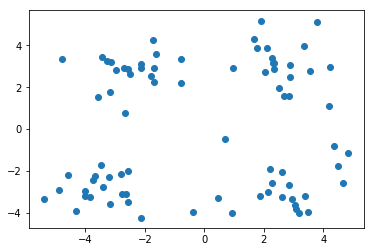

In [54]:
plt.scatter(testSet.iloc[:,0].values,testSet.iloc[:,1].values);

In [55]:
pd.DataFrame(np.zeros(testSet.shape[0]).reshape(-1,1))[:2]

,0
0,0.0
1,0.0


In [56]:
label = pd.DataFrame(np.zeros(testSet.shape[0]).reshape(-1, 1))
test_set = pd.concat([testSet, label], axis=1, ignore_index = True)
test_set.head()

,0,1,2
0,1.658985,4.285136,0.0
1,-3.453687,3.424321,0.0
2,4.838138,-1.151539,0.0
3,-5.379713,-3.362104,0.0
4,0.972564,2.924086,0.0


In [57]:
test_cent, test_cluster = kMeans(test_set, 4)

In [58]:
test_cent

array([[ 2.65077367, -2.79019029],
       [-2.46154315,  2.78737555],
       [ 2.6265299 ,  3.10868015],
       [-3.53973889, -2.89384326]])

In [59]:
test_cluster.head(3)

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,2.320192,2.0,2.0
1,-3.453687,3.424321,0.0,1.390049,1.0,1.0
2,4.838138,-1.151539,0.0,7.469741,0.0,0.0


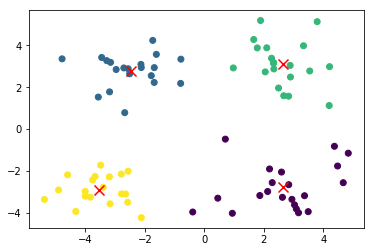

In [60]:
plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
plt.scatter(test_cent[:, 0], test_cent[:, 1], color='red',marker='x',s=100);

In [61]:
test_cluster.iloc[:,3].sum()

150.62604907269227

In [62]:
iris_result.iloc[:,5].sum()

78.94506582597731

In [63]:
def kcLearningCurve(dataSet, cluster = kMeans, k=10):
    n = dataSet.shape[1]
    SSE = []
    for i in range(1, k):
        centroids, result_set = cluster(dataSet, i+1)
        SSE.append(result_set.iloc[:,n].sum())
    plt.plot(range(2, k+1), SSE, '--o')
    return SSE

[792.9168565373268,
 507.64014876630034,
 149.95430467642635,
 135.38166579216687,
 119.7074693344359,
 100.90403180593142,
 87.81019177527779,
 99.82317046220274,
 84.36789091673955]

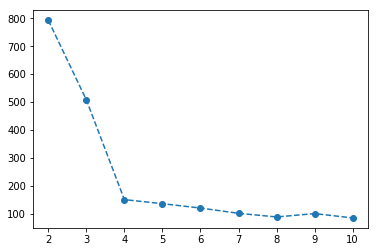

In [64]:
kcLearningCurve(test_set)

[152.36870647733906,
 78.94084142614602,
 78.94506582597731,
 57.47147508745626,
 52.31034024213439,
 46.14331360089187,
 43.95297998752253,
 38.077402509062935,
 34.6459495659924]

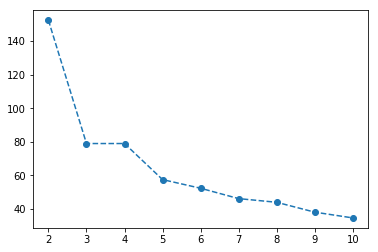

In [68]:
kcLearningCurve(iris)

463.6496809222772
506.0588518418539
405.13810196190366
405.13810196190366


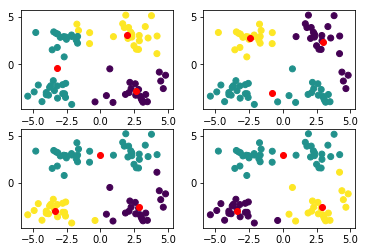

In [69]:
np.random.seed(123)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    test_cent, test_cluster = kMeans(test_set, 3)
    plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
    plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')
    print(test_cluster.iloc[:, 3].sum())

438.99925511275205
149.95430467642635
149.95430467642635
150.62604907269227


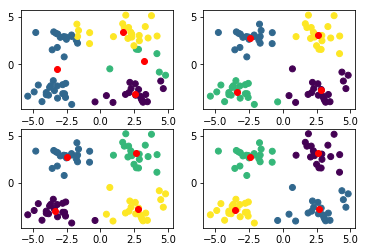

In [70]:
np.random.seed(123)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    test_cent, test_cluster = kMeans(test_set, 4)
    plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
    plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')
    print(test_cluster.iloc[:, 3].sum())

132.51859467191917
134.72812560240237
134.4631443966685
131.89160568812764


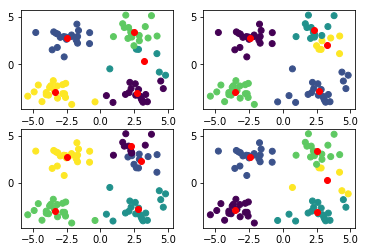

In [71]:
np.random.seed(123)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    test_cent, test_cluster = kMeans(test_set, 5)
    plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
    plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')
    print(test_cluster.iloc[:, 3].sum())

In [72]:
def kMeans_1(dataSet, k, distMeas=distEclud, createCent=randCent):
    m,n = dataSet.shape
    centroids = createCent(dataSet, k)
    clusterAssment = np.zeros((m,3))
    clusterAssment[:, 0] = np.inf
    clusterAssment[:, 1: 3] = -1
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1, ignore_index = True)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            dist = distMeas(dataSet.iloc[i, :n-1].values, centroids)
            result_set.iloc[i, n] = dist.min()
            result_set.iloc[i, n+1] = np.where(dist == dist.min())[0]
        clusterChanged = not (result_set.iloc[:, -1] == result_set.iloc[:, -2]).all()
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n-1].values
            result_set.iloc[:, -1] = result_set.iloc[:, -2]
        plt.scatter(result_set.iloc[:,0], result_set.iloc[:, 1], c=result_set.iloc[:, -1])
        plt.plot(centroids[:, 0], centroids[:, 1], 'o', color='red')
        plt.show()

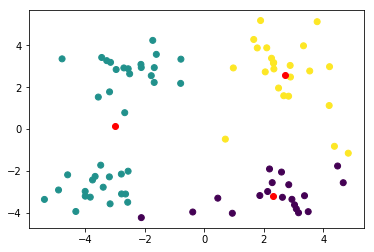

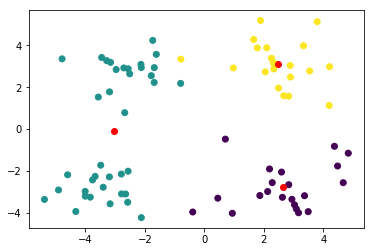

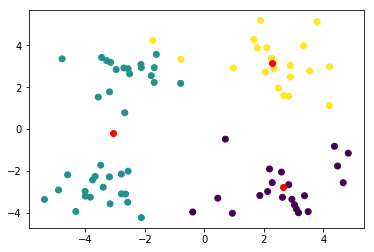

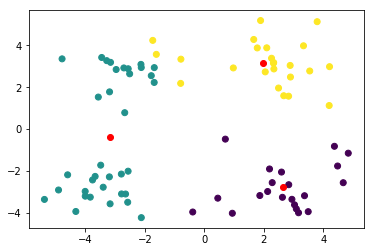

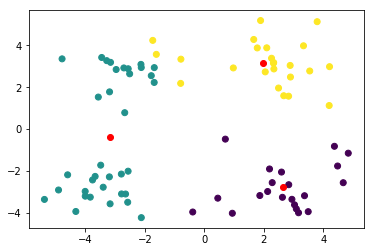

In [73]:
np.random.seed(123)
kMeans_1(test_set, 3)

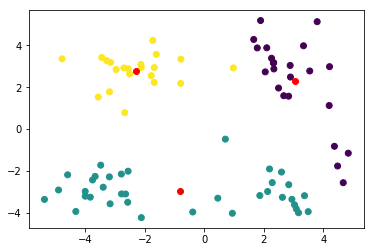

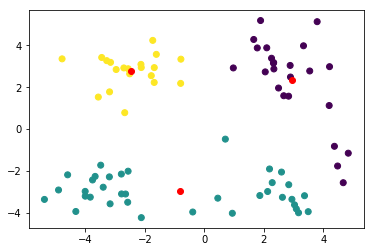

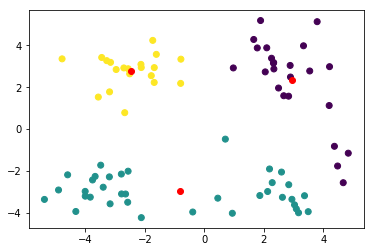

In [74]:
kMeans_1(test_set, 3)

In [76]:
test_set.head()

,0,1,2
0,1.658985,4.285136,0.0
1,-3.453687,3.424321,0.0
2,4.838138,-1.151539,0.0
3,-5.379713,-3.362104,0.0
4,0.972564,2.924086,0.0


In [77]:
n = test_set.shape[1]

In [78]:
n

3

In [80]:
test_set.iloc[:, :n-1].mean()

0   -0.103613
1    0.054301
dtype: float64

In [81]:
np.mean(test_set.iloc[:, :n-1])

0   -0.103613
1    0.054301
dtype: float64

In [82]:
centroids = np.array(np.mean(test_set.iloc[:, :n-1]))
centroids

array([-0.10361321,  0.0543012 ])

In [83]:
test_SSE = distEclud(test_set.iloc[:, :n-1], centroids).sum()
test_SSE

1465.5800234838161

In [84]:
centroids1, result1 = kMeans(test_set, 2)

In [85]:
centroids1

array([[-0.2897198 , -2.83942545],
       [ 0.08249338,  2.94802785]])

In [87]:
result1.head(3)

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,4.273184,1.0,1.0
1,-3.453687,3.424321,0.0,12.731427,1.0,1.0
2,4.838138,-1.151539,0.0,29.143886,0.0,0.0


In [88]:
test_SSE1 = result1.iloc[:, n].sum()
test_SSE1

792.9168565373268

In [89]:
def kMeans_assment(dataSet, centroids, distMeas = distEclud):
    m,n= dataSet.shape
    clusterAssment = np.zeros((m,3))
    clusterAssment[:, 0] = np.inf
    clusterAssment[:, 1: 3] = -1
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1, ignore_index = True)
    for i in range(m):
        dist = distMeas(dataSet.iloc[i, :n-1].values, centroids)
        result_set.iloc[i, n] = dist.min()
        result_set.iloc[i, n+1] = np.where(dist == dist.min())[0]
        result_set.iloc[:, -1] = result_set.iloc[:, -2]
    return result_set

In [90]:
result_set = kMeans_assment(test_set, centroids1)

In [92]:
result_set.head(3)

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,4.273184,1.0,1.0
1,-3.453687,3.424321,0.0,12.731427,1.0,1.0
2,4.838138,-1.151539,0.0,29.143886,0.0,0.0


In [ ]:
def biKmeans(dataSet, k, distMeas = distEclud):
    m,n = dataSet.shape
    centroids, result_set = kMeans(dataSet, 2)
    j = 2
    while j < k:
        result_tmp = result_set.groupby(n+1).sum()
        clusterAssment = pd.concat([pd.DataFrame(centroids), result_tmp.iloc[:,n]], axis = 1, ignore_index = True)
        lowestSSE = clusterAssment.iloc[:, n-1].sum()
        centList = []
        sseTotle = np.array([])
        for i in clusterAssment.index:
            df_temp = result_set.iloc[:, :n][result_set.iloc[:, -1] == i]
            df_temp.index = range(df_temp.shape[0])
            cent, res = kMeans(df_temp, 2, distMeas)
            centList.append(cent)
            sseSplit = res.iloc[:, n].sum()
            sseNotSplit = result_set.iloc[:, n][result_set.iloc[:, -1] != i].sum()
            sseTotle = np.append(sseTotle, sseSplit + sseNotSplit)
        min_index = np.where(sseTotle == sseTotle.min())[0][0]
        clusterAssment = clusterAssment.drop([min_index])
        centroids = np.vstack([clusterAssment.iloc[:, :n-1].values, centList[min_index]])
        result_set = kMeans_assment(dataSet, centroids)
        j = j + 1
    return centroids, result_set

In [93]:
dataSet = test_set
k = 4
distMeas = distEclud

In [94]:
m,n = dataSet.shape

In [95]:
m

80

In [96]:
n

3

In [97]:
centroids, result_set = kMeans(dataSet, 2)

In [98]:
centroids

array([[-3.09539062, -2.26219085],
       [ 1.3368722 ,  1.16964922]])

In [100]:
result_set.head(3)

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,9.810015,1.0,1.0
1,-3.453687,3.424321,0.0,28.033002,1.0,1.0
2,4.838138,-1.151539,0.0,17.646777,1.0,1.0


In [101]:
j = 2

In [103]:
result_tmp =result_set.groupby(n+1).sum()

In [104]:
result_tmp

,0,1,2,3,5
4,,,,,
0.0,-80.480156,-58.816962,0.0,151.554026,0.0
1.0,72.191099,63.161058,0.0,762.561474,54.0


In [105]:
result_tmp.iloc[:,n]

4
0.0    151.554026
1.0    762.561474
Name: 3, dtype: float64

In [106]:
clusterAssment = pd.concat([pd.DataFrame(centroids), result_tmp.iloc[:,n]], axis = 1, ignore_index = True)
clusterAssment

,0,1,2
0,-3.095391,-2.262191,151.554026
1,1.336872,1.169649,762.561474


In [107]:
clusterAssment.iloc[:, n-1]

0    151.554026
1    762.561474
Name: 2, dtype: float64

In [108]:
lowestSSE = clusterAssment.iloc[:, n-1].sum()
lowestSSE

914.1155003194734

In [111]:
clusterAssment.index[1]

1

In [112]:
i=0

In [114]:
result_set.iloc[:, :n][:3]

,0,1,2
0,1.658985,4.285136,0.0
1,-3.453687,3.424321,0.0
2,4.838138,-1.151539,0.0


In [119]:
[result_set.iloc[:, -1] == i][0][:3]

0    False
1    False
2    False
Name: 5, dtype: bool

In [121]:
result_set.iloc[:, :n][result_set.iloc[:, -1] == i].head(3)

,0,1,2
3,-5.379713,-3.362104,0.0
5,-3.567919,1.531611,0.0
6,0.450614,-3.302219,0.0


In [126]:
result_set[result_set.iloc[:, -1] == i].iloc[:,:n].head(3)

,0,1,2
3,-5.379713,-3.362104,0.0
5,-3.567919,1.531611,0.0
6,0.450614,-3.302219,0.0


In [128]:
df_temp = result_set.iloc[:, :n][result_set.iloc[:, -1] == i]
df_temp.head(3)

,0,1,2
3,-5.379713,-3.362104,0.0
5,-3.567919,1.531611,0.0
6,0.450614,-3.302219,0.0


In [130]:
df_temp.index = range(df_temp.shape[0])
df_temp.head(3)

,0,1,2
0,-5.379713,-3.362104,0.0
1,-3.567919,1.531611,0.0
2,0.450614,-3.302219,0.0


In [131]:
cent, res = kMeans(df_temp, 2, distMeas)

In [132]:
cent

array([[-3.55571825,  1.8638865 ],
       [-3.01169468, -3.01238673]])

In [134]:
res.head(3)

,0,1,2,3,4,5
0,-5.379713,-3.362104,0.0,5.729813,1.0,1.0
1,-3.567919,1.531611,0.0,0.110556,0.0,0.0
2,0.450614,-3.302219,0.0,12.071584,1.0,1.0


In [135]:
centList = []
centList.append(cent)

In [136]:
centList

[array([[-3.55571825,  1.8638865 ],
        [-3.01169468, -3.01238673]])]

In [137]:
sseSplit = res.iloc[:, n].sum()
sseSplit

70.07278809984288

In [138]:
sseNotSplit = result_set.iloc[:, n][result_set.iloc[:, -1] != i].sum()
sseNotSplit

762.56147390354

In [139]:
sseTotle = np.array([])
sseTotle = np.append(sseTotle, sseSplit + sseNotSplit)

In [140]:
sseTotle

array([832.634262])

In [141]:
i=1
df_temp = result_set.iloc[:, :n][result_set.iloc[:, -1] == i]
df_temp.index = range(df_temp.shape[0])
cent, res = kMeans(df_temp, 2, distMeas)
centList.append(cent)
sseSplit = res.iloc[:, n].sum()
sseNotSplit = result_set.iloc[:, n][result_set.iloc[:, -1] != i].sum()
sseTotle = np.append(sseTotle, sseSplit + sseNotSplit)

In [142]:
sseTotle

array([832.634262  , 443.25428886])

In [143]:
sseTotle == sseTotle.min()

array([False,  True])

In [146]:
np.where(sseTotle == sseTotle.min())[0][0]

1

In [147]:
min_index = np.where(sseTotle == sseTotle.min())[0][0]

In [148]:
clusterAssment.head()

,0,1,2
0,-3.095391,-2.262191,151.554026
1,1.336872,1.169649,762.561474


In [149]:
clusterAssment = clusterAssment.drop([min_index])

In [150]:
clusterAssment

,0,1,2
0,-3.095391,-2.262191,151.554026


In [151]:
clusterAssment.iloc[:, :n-1]

,0,1
0,-3.095391,-2.262191


In [153]:
centList[min_index]

array([[ 3.09814284, -2.43041226],
       [ 0.38075386,  3.12396831]])

In [154]:
centroids = np.vstack([clusterAssment.iloc[:, :n-1].values, centList[min_index]])
centroids

array([[-3.09539062, -2.26219085],
       [ 3.09814284, -2.43041226],
       [ 0.38075386,  3.12396831]])

In [156]:
result_set = kMeans_assment(dataSet, centroids)
result_set.head(3)

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,2.982185,2.0,2.0
1,-3.453687,3.424321,0.0,14.793148,2.0,2.0
2,4.838138,-1.151539,0.0,4.663100,1.0,1.0


In [157]:
result_set.iloc[:,-1].value_counts()

2.0    37
0.0    22
1.0    21
Name: 5, dtype: int64

In [158]:
def biKmeans(dataSet, k, distMeas = distEclud):
    m,n = dataSet.shape
    centroids, result_set = kMeans(dataSet, 2)
    j = 2
    while j < k:
        result_tmp = result_set.groupby(n+1).sum()
        clusterAssment = pd.concat([pd.DataFrame(centroids), result_tmp.iloc[:,n]], axis = 1, ignore_index = True)
        lowestSSE = clusterAssment.iloc[:, n-1].sum()
        centList = []
        sseTotle = np.array([])
        for i in clusterAssment.index:
            df_temp = result_set.iloc[:, :n][result_set.iloc[:, -1] == i]
            df_temp.index = range(df_temp.shape[0])
            cent, res = kMeans(df_temp, 2, distMeas)
            centList.append(cent)
            sseSplit = res.iloc[:, n].sum()
            sseNotSplit = result_set.iloc[:, n][result_set.iloc[:, -1] != i].sum()
            sseTotle = np.append(sseTotle, sseSplit + sseNotSplit)
        min_index = np.where(sseTotle == sseTotle.min())[0][0]
        clusterAssment = clusterAssment.drop([min_index])
        centroids = np.vstack([clusterAssment.iloc[:, :n-1].values, centList[min_index]])
        result_set = kMeans_assment(dataSet, centroids)
        j = j + 1
    return centroids, result_set

In [159]:
test_cent, test_cluster = biKmeans(test_set, 4)

In [160]:
test_cent

array([[-3.09539062, -2.26219085],
       [ 3.09814284, -2.43041226],
       [ 2.54391447,  3.21299611],
       [-2.38799628,  2.96837672]])

In [162]:
test_cluster.head(3)

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,1.932584,2.0,2.0
1,-3.453687,3.424321,0.0,1.343582,3.0,3.0
2,4.838138,-1.151539,0.0,4.663100,1.0,1.0


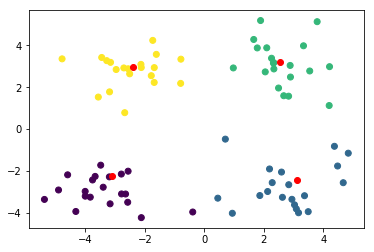

In [164]:
plt.scatter(test_cluster.iloc[:,0].values,test_cluster.iloc[:,1].values,c =test_cluster.iloc[:,-1] );
plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red');

In [169]:
centroids, result_set = biKmeans(test_set, 4)
result_set.head(3)  

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,1.932584,3.0,3.0
1,-3.453687,3.424321,0.0,1.390049,2.0,2.0
2,4.838138,-1.151539,0.0,7.469741,1.0,1.0


In [170]:
centroids

array([[-3.53973889, -2.89384326],
       [ 2.65077367, -2.79019029],
       [-2.46154315,  2.78737555],
       [ 2.54391447,  3.21299611]])

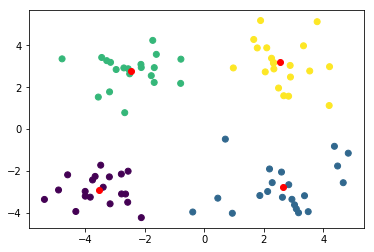

In [171]:
plt.scatter(result_set.iloc[:,0], result_set.iloc[:, 1], c=result_set.iloc[:, -1])
plt.plot(centroids[:, 0], centroids[:, 1], 'o', color='red');

In [172]:
result = result_set.copy()
m, n = result.shape

In [173]:
m

80

In [174]:
n

6

In [175]:
nc = len(centroids)
nc

4

In [177]:
result.head(3)

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,1.932584,3.0,3.0
1,-3.453687,3.424321,0.0,1.390049,2.0,2.0
2,4.838138,-1.151539,0.0,7.469741,1.0,1.0


In [178]:
for i in range(nc):
    result[n+i]=0

In [179]:
result.head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.658985,4.285136,0.0,1.932584,3.0,3.0,0,0,0,0
1,-3.453687,3.424321,0.0,1.390049,2.0,2.0,0,0,0,0
2,4.838138,-1.151539,0.0,7.469741,1.0,1.0,0,0,0,0


In [180]:
result_list = []
for i in range(nc):
    result_temp = result[result.iloc[:, n-1] == i]
    result_temp.index = range(result_temp.shape[0])
    result_list.append(result_temp)

In [183]:
for i in range(m):
    for j in range(nc):
        result.iloc[i,n+j]=distEclud(result.iloc[i, :n-4].values,result_list[j].iloc[:, :n-4].values).mean()

In [185]:
result.head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.658985,4.285136,0.0,1.932584,3.0,3.0,79.727802,54.003695,20.724456,4.136116
1,-3.453687,3.424321,0.0,1.390049,2.0,2.0,41.089933,78.844399,2.892466,38.884591
2,4.838138,-1.151539,0.0,7.469741,1.0,1.0,74.387774,10.429549,70.302810,24.856602


In [186]:
result["a"]=0
result["b"]=0

In [188]:
result.head(5)

,0,1,2,3,4,5,6,7,8,9,a,b
0,1.658985,4.285136,0.0,1.932584,3.0,3.0,79.727802,54.003695,20.724456,4.136116,0,0
1,-3.453687,3.424321,0.0,1.390049,2.0,2.0,41.089933,78.844399,2.892466,38.884591,0,0
2,4.838138,-1.151539,0.0,7.469741,1.0,1.0,74.387774,10.429549,70.302810,24.856602,0,0
3,-5.379713,-3.362104,0.0,3.604773,0.0,0.0,4.768101,67.775610,47.834231,107.786897,0,0
4,0.972564,2.924086,0.0,2.552611,3.0,3.0,55.372507,38.429150,13.314199,4.585602,0,0


In [189]:
for i in range(m):
    l_temp=[]
    for j in range(nc):
        if(result.iloc[i,n-1] == j):
            result.loc[i,"a"] = result.iloc[i, n+j]
        else:
            l_temp.append(result.iloc[i, n+j])
    result.loc[i,"b"] = np.array(l_temp).min()

In [190]:
result.head()

,0,1,2,3,4,5,6,7,8,9,a,b
0,1.658985,4.285136,0.0,1.932584,3.0,3.0,79.727802,54.003695,20.724456,4.136116,4.136116,20.724456
1,-3.453687,3.424321,0.0,1.390049,2.0,2.0,41.089933,78.844399,2.892466,38.884591,2.892466,38.884591
2,4.838138,-1.151539,0.0,7.469741,1.0,1.0,74.387774,10.429549,70.302810,24.856602,10.429549,24.856602
3,-5.379713,-3.362104,0.0,3.604773,0.0,0.0,4.768101,67.775610,47.834231,107.786897,4.768101,47.834231
4,0.972564,2.924086,0.0,2.552611,3.0,3.0,55.372507,38.429150,13.314199,4.585602,4.585602,13.314199


In [191]:
def silhouetteCoe(result):
    result_set = result.copy()
    m, n = result_set.shape
    nc = len(centroids)
    for i in range(nc):
        result_set[n+i]=0
    result_list = []
    for i in range(nc):
        result_temp = result_set[result_set.iloc[:, n-1] == i]
        result_temp.index = range(result_temp.shape[0])
        result_list.append(result_temp)
    for i in range(m):
        for j in range(nc):
            result_set.iloc[i,n+j]=distEclud(result_set.iloc[i, :n-4].values,result_list[j].iloc[:, :n-4].values).mean()
    result_set["a"]=0
    result_set["b"]=0
    for i in range(m):
        l_temp=[]
        for j in range(nc):
            if(result_set.iloc[i,n-1] == j):
                result_set.loc[i,"a"] = result_set.iloc[i, n+j]
            else:
                l_temp.append(result_set.iloc[i, n+j])
        result_set.loc[i,"b"] = np.array(l_temp).min()
    result_set["s"] = (result_set.loc[:,"b"]-result_set.loc[:,"a"]) / result_set.loc[:,"a":"b"].max(axis=1)
    return result_set["s"].mean()

In [208]:
result_set.head()

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,0.488716,3.0,3.0
1,-3.453687,3.424321,0.0,1.390049,1.0,1.0
2,4.838138,-1.151539,0.0,0.241283,5.0,5.0
3,-5.379713,-3.362104,0.0,4.161410,0.0,0.0
4,0.972564,2.924086,0.0,2.567693,3.0,3.0


In [209]:
re = silhouetteCoe(result_set)

In [210]:
re

0.691799604937829

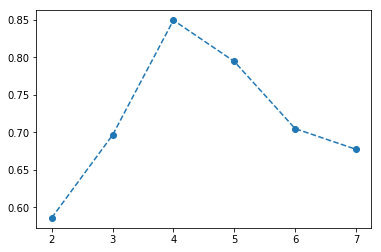

In [212]:
sil = []
for i in range(1, 7):
    centroids, result_set = biKmeans(test_set, i+1)
    sil.append(silhouetteCoe(result_set))
plt.plot(range(2, 8), sil, '--o')

In [213]:
dfTest = pd.DataFrame({'X1':[1, 2, 3], 'X2':[2, 7, 8]})
dfTest

,X1,X2
0,1,2
1,2,7
2,3,8


In [214]:
dfTest.min()

X1    1
X2    2
dtype: int64

In [215]:
def MaxMinNormalization(dataSet):
    maxDf = dataSet.max()
    minDf = dataSet.min()
    normSet = (dataSet - minDf) / (maxDf - minDf)
    return normSet

In [216]:
MaxMinNormalization(dfTest)

,X1,X2
0,0.0,0.000000
1,0.5,0.833333
2,1.0,1.000000


In [217]:
dfTest.mean()

X1    2.000000
X2    5.666667
dtype: float64

In [218]:
dfTest.std()

X1    1.00000
X2    3.21455
dtype: float64

In [219]:
def Z_ScoreNormalization(dataSet):
    stdDf = dataSet.std()
    meanDf = dataSet.mean()
    normSet = (dataSet - meanDf) / stdDf
    return normSet 

In [220]:
Z_ScoreNormalization(dfTest)

,X1,X2
0,-1.0,-1.140647
1,0.0,0.414781
2,1.0,0.725866


In [221]:
def sigmodNormalization(dataSet):
    normSet = 1 / (1 + np.exp(-dataSet))
    return normSet

In [222]:
sigmodNormalization(dfTest)

,X1,X2
0,0.731059,0.880797
1,0.880797,0.999089
2,0.952574,0.999665
